In [337]:
%matplotlib inline

In [338]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
from pandas import DataFrame, Series

In [339]:
complaints = pd.read_csv('complaints_dec_2014.csv')
# complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


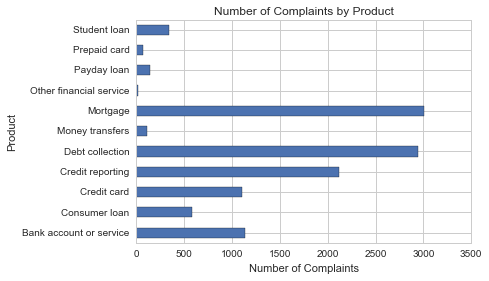

In [340]:
by_product = complaints.groupby('Product').size()

ax = by_product.plot.barh(title='Number of Complaints by Product')
ax.set_xlabel("Number of Complaints")

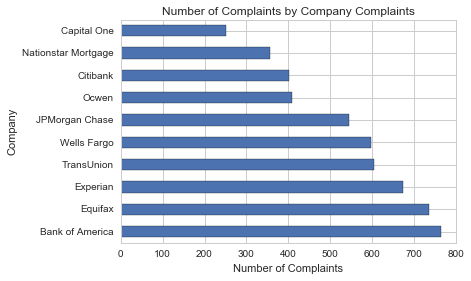

In [341]:
by_company = complaints.groupby('Company').size()
top_10_company_complaints = by_company.sort_values(ascending=False).head(10)

ax = top_10_company_complaints.plot.barh(title='Number of Complaints by Company Complaints')
ax.set_xlabel("Number of Complaints")

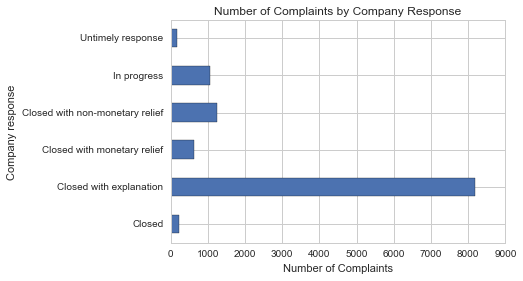

In [342]:
by_response = complaints.groupby('Company response').size()

ax = by_response.plot.barh(title='Number of Complaints by Company Response')
ax.set_xlabel("Number of Complaints")

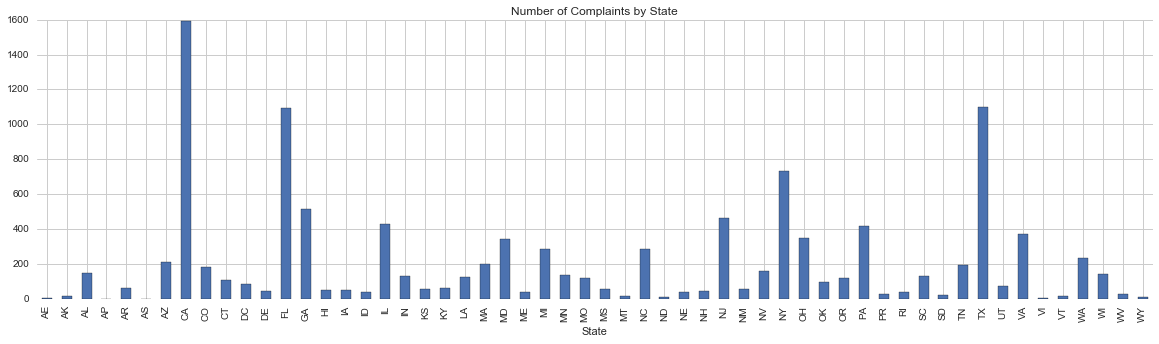

In [343]:
by_state = complaints.groupby('State').size()

ax = by_state.plot.bar(title='Number of Complaints by State', figsize=(20,5))
sns.set(style="whitegrid")

sns.despine(right=True, left=True, bottom=True)

# df.plot.scatter(x='a', y='b');

In [344]:
date_complaints = complaints.copy()
consumer_complaints_by_date = date_complaints['Date sent to company']

In [345]:
date_complaints.index = pd.to_datetime(consumer_complaints_by_date, format='%m/%d/%Y')
# unique_week = date_complaints.index.unique()
date_complaints['weekday'] = date_complaints.index.to_series().map(lambda day: day.weekday())
day_of_week = date_complaints.groupby('weekday').size()
day_of_week.head(10)

weekday
0    2609
1    2450
2    2540
3    1449
4    1742
5     429
6     324
dtype: int64

In [346]:
# date_complaints = date_complaints.rename(columns={'Date sent to company': 'date_sent_to_company'})
# date_complaints.head(10)

In [368]:
complaints = complaints.rename(columns={'Date sent to company': 'date_sent_to_company'})
mcbd = complaints[['date_sent_to_company', 'Complaint ID']].copy()
mcbd['date_sent_to_company'] = pd.to_datetime(mcbd['date_sent_to_company'])
# mcbd['date_sent_to_company'] = pd.to_datetime(mcbd['date_sent_to_company'], format='%m/%d/%Y')
mcbd['weekday'] = mcbd['date_sent_to_company'].dt.dayofweek

by_day = mcbd['date_sent_to_company'].groupby(mcbd['weekday']).count()
by_day.value_counts()

# date_set = by_day.to_series().map(lambda d: d.weekday())
# date_set = set(mcbd.date_sent_to_company)
# date_set = sorted(list(date_set))
# date_set = pd.to_datetime(date_set, format='%m/%d/%Y')
# date_set.value_counts()

1742    1
429     1
2540    1
1449    1
324     1
2450    1
2609    1
dtype: int64

In [369]:
by_day.head(10)

weekday
0    2609
1    2450
2    2540
3    1449
4    1742
5     429
6     324
dtype: int64

In [370]:
mcbd = complaints[['date_sent_to_company', 'Complaint ID']].copy()
date_set = set(mcbd.date_sent_to_company)
date_set = sorted(list(date_set))
date_set = pd.to_datetime(date_set, format='%m/%d/%Y')
date_set = date_set.to_series().map(lambda d: d.weekday())
date_set.value_counts()

4    8
3    8
2    8
1    8
0    8
5    5
6    4
dtype: int64